In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [4]:
#encoding the categorical data manually

In [5]:
data['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [6]:
cloud={'partly cloudy':1, 'clear':2, 'overcast':3, 'cloudy':4}
data['Cloud Cover']=data['Cloud Cover'].map(cloud)

In [7]:
data['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [8]:
season={'Winter':1, 'Spring':2, 'Summer':3, 'Autumn':4}
data['Season']=data['Season'].map(season)

In [9]:
data['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [10]:
loc={'inland':1,'mountain':2,'coastal':3}
data['Location']=data['Location'].map(loc)

In [11]:
data['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [12]:
wtype={'Rainy':0, 'Cloudy':1, 'Sunny':2, 'Snowy':3}
data['Weather Type']=data['Weather Type'].map(wtype)

In [13]:
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,1,1010.82,2,1,3.5,1,0
1,39.0,96,8.5,71.0,1,1011.43,7,2,10.0,1,1
2,30.0,64,7.0,16.0,2,1018.72,5,2,5.5,2,2
3,38.0,83,1.5,82.0,2,1026.25,7,2,1.0,3,2
4,27.0,74,17.0,66.0,3,990.67,1,1,2.5,2,0


In [14]:
data.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int64
Atmospheric Pressure    float64
UV Index                  int64
Season                    int64
Visibility (km)         float64
Location                  int64
Weather Type              int64
dtype: object

In [15]:
# checking null values
data.isnull().sum().sum()

0

In [16]:
#checking duplicated values
data.duplicated().sum()


0

In [17]:
x=data.drop('Weather Type',axis=1)
y=data['Weather Type']

In [18]:
# train test split
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train.shape


(10560, 10)

In [21]:
#training the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [22]:
model_dict={
    'lr_model':LogisticRegression(),
'dt_model':DecisionTreeClassifier(),
'svc_model':SVC(),
'knn_model':KNeighborsClassifier(),
'gbm_model':LGBMClassifier(),
'xg_model':XGBClassifier()
}

In [23]:
#test the accuracy
from sklearn.metrics import accuracy_score

In [24]:
acs=[]

In [116]:
for name,model in model_dict.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    acs.append(ac)

    
    

C:\Users\kcbar\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 10560, number of used features: 10
[LightGBM] [Info] Start training from score -1.381382
[LightGBM] [Info] Start training from score -1.382891
[LightGBM] [Info] Start training from score -1.379123
[LightGBM] [Info] Start training from score -1.401947


In [117]:
print(acs)

[0.843939393939394, 0.9090909090909091, 0.8272727272727273, 0.884090909090909, 0.9147727272727273, 0.9121212121212121]


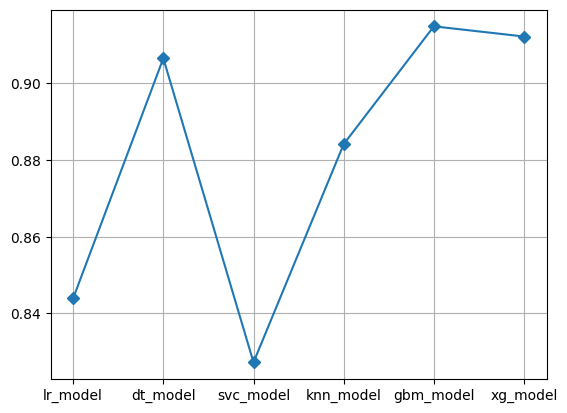

In [87]:
# plot the accuracy
plt.plot(model_dict.keys(),acs,marker='D')
plt.grid()

In [119]:
# since thea accuracy of gbm model is high we go with the lightgbm 

In [120]:
gbm_model=LGBMClassifier()

In [123]:
gbm_model.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 728
[LightGBM] [Info] Number of data points in the train set: 10560, number of used features: 10
[LightGBM] [Info] Start training from score -1.381382
[LightGBM] [Info] Start training from score -1.382891
[LightGBM] [Info] Start training from score -1.379123
[LightGBM] [Info] Start training from score -1.401947


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [124]:
y_pred1=gbm_model.predict(x_test)
y_pred1[0:10]

array([2, 2, 2, 3, 2, 3, 0, 0, 0, 3], dtype=int64)

In [126]:
acs1=accuracy_score(y_test,y_pred1)
acs1

0.9147727272727273

In [127]:
import joblib

In [128]:
joblib.dump(gbm_model,'gbm_model.pt')

['gbm_model.pt']